# serial-comm: comunicación y registro de datos por puerto serial
Autor: Claudio Morales D.<br>
https://github.com/cmoralesd/serial-comm <br>
Otoño 2023<br>
<br>
Código base para establecer comunicación por puerto serial entre un dispositivo Arduino (o similar) y un script de Python, utilizando la librería **pyserial**, controlar entradas y salidas del módulo Arduino mediante valores numéricos intercambiados en formato de texto, registrar datos en un archivo CSV, procesar los datos utilizando las herramientas básicas de la librería **pandas** y obtener gráficos de los datos registrados utilizando **matplotlib.pyplot**.

Para comprender las características generales de la comunicación serial, consulte: https://hetpro-store.com/TUTORIALES/puerto-serial/

Los archivos para programación del módulo Arduino se encuentran en https://github.com/cmoralesd/serial-comm


In [42]:
# librerías requeridas
import serial  # librería pyserial, para comunicación con los puertos serial < pip install pyserial >
import time    # para el manejo de eventos de tiempo, nativa de Python
import pandas as pd  # para el manejo de archivos de datos < pip install pandas >
import matplotlib.pyplot as plt # para realizar gráficos < pip install matplotlib >


# funciones para enviar y recibir mensajes en formato de texto, codificado en UTF-8
# los mensajes utilizan como terminador un caracter de final de línea '\n'
def encode_send(ser, texto):
    enc = f'{texto}\n'.encode('UTF-8')
    ser.write(enc)

def decode_response(ser):
    message_from_serial = ser.readline()
    res = message_from_serial[:-1].decode()
    return res


### 1. Código base en esquema request-response

El esquema de comunicación utilizado es **maestro-esclavo** (master-slave) en modo **request-response** (requerimiento-respuesta): sólo un dispositivo puede iniciar la comunicación enviando un requerimiento y el otro dispositivo responde. 

En este caso, el script de Python siempre inicia la comunicación, con un mensaje de texto que contiene dos valores enteros separados por una coma (,). El dispositivo Arduino recibe el mensaje, lo procesa, y envía una respuesta.

El código utilizado en Arduino es: **serial-comm.ino**

In [43]:
# Esquema básico para request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.5)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
val_0 = 123
val_1 = 456
message_to_serial = str(val_0) + ',' + str(val_1)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)

# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')
print(f'recibido: {message_from_serial}')

# 5. Cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')


enviado: 123,456
recibido: Arduino OK
el puerto se ha cerrado correctamente


### 2. Enviando mensajes en forma cíclica

El código utilizado en Arduino es: **serial-comm.ino**

In [44]:
serialport.close()

In [45]:
time.perf_counter()

449460.3338575

In [46]:
# Esquema básico para comunicarse por puerto serial en forma cíclica
# El código utilizado en Arduino es: serial-comm.ino

# inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1)   # tiempo de espera recomendado: 100 ms

time_start = time.perf_counter()
time_elapsed = time.perf_counter() - time_start
time_stop = 5. #en segundos

# inicia el ciclo de intercambio de datos


while time_elapsed < time_stop:
    # Preparamos el mensaje a ser transmitido
    val_0 = 0
    val_1 = 0
    message_to_serial = str(val_0) + ',' + str(val_1)

    # enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    # procesamos la respuesta
    print(f'enviado: {message_to_serial}')
    print(f'recibido: {message_from_serial}')

    #actualizar la medición de tiempo
    time_elapsed = time.perf_counter() - time_start
    print(f'tiempo: {time_elapsed}')
    time.sleep(0.2) # en segundos

# cierra el puerto serial
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 0,0
recibido: Arduino OK
tiempo: 0.561702300037723
enviado: 0,0
recibido: 525;494
tiempo: 0.800231300003361
enviado: 0,0
recibido: 525;494
tiempo: 1.0386167000397108
enviado: 0,0
recibido: 525;494
tiempo: 1.2776140000205487
enviado: 0,0
recibido: 525;494
tiempo: 1.5158125000307336
enviado: 0,0
recibido: 525;494
tiempo: 1.7537185000255704
enviado: 0,0
recibido: 525;494
tiempo: 1.9921140000224113
enviado: 0,0
recibido: 525;494
tiempo: 2.2314001000486314
enviado: 0,0
recibido: 525;494
tiempo: 2.469444200047292
enviado: 0,0
recibido: 525;494
tiempo: 2.7084139000508003
enviado: 0,0
recibido: 525;494
tiempo: 2.9468015000456944
enviado: 0,0
recibido: 525;494
tiempo: 3.1855620000278577
enviado: 0,0
recibido: 525;494
tiempo: 3.42490630003158
enviado: 0,0
recibido: 525;494
tiempo: 3.664232400013134
enviado: 0,0
recibido: 525;494
tiempo: 3.9026338000549003
enviado: 0,0
recibido: 525;494
tiempo: 4.1414183000451885
enviado: 0,0
recibido: 525;494
tiempo: 4.380109700025059
enviado: 0,0
recib

### 2. Controlando pines I/O en el dispositivo Arduino

El código utilizado en Arduino es: **serial-control.ino**

In [47]:
serialport.close()

In [59]:
# Esquema básico para control de pines I/O en modo request-response
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicación y espera a que esté listo
serialport = serial.Serial('COM7', 9600)
time.sleep(0.5)   # tiempo de espera recomendado: 100 ms

# 2. Preparamos el mensaje a ser transmitido
led_verde = 0    # 0 = apagado, otro valor = encendido
led_rojo = 128     # nivel PWM entre 0 y 255
message_to_serial = str(led_verde) + ',' + str(led_rojo)

# 3. Enviamos al puerto y esperamos la respuesta
encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport) #Primer mensaje es descartado (debido a que es un str/texto)

encode_send(serialport, message_to_serial)
message_from_serial = decode_response(serialport)


# 4. Procesamos la respuesta
print(f'enviado: {message_to_serial}')

data = message_from_serial.split(';')
val_x = int(data[0])
val_y = int(data[1])
print(f'val_x = {val_x}')
print(f'val_y = {val_y}')

# 5. Cierra el puerto serial

serialport.close()
print('el puerto se ha cerrado correctamente')



enviado: 0,128
val_x = 525
val_y = 494
el puerto se ha cerrado correctamente


### 4. Registrando datos recibidos desde el puerto serial

El código utilizado en Arduino es: **serial-control.ino**

In [49]:
filename = 'dataset' + time.strftime('<%d-%m-%y-%H:%M:%S>') + '.csv'
filename

'dataset<07-06-23-21:40:41>.csv'

In [60]:
serialport.close()

In [61]:
# Registro de transacciones vía puerto serial
# El código utilizado en Arduino es: serial-comm.ino

# 1. Inicializa el puerto de comunicaciones
serialport = serial.Serial('COM7', 9600)
time.sleep(0.1) 
# 2. Inicializa el archivo de registro de datos
filename = 'dataset' + time.strftime('%d-%m-%y-%H%M%S') + '.csv'
with open(filename, 'w') as file:
    file.write('tiempo,led_verde,led_rojo,val_x,val_y\n')

# 3. Registra las transacciones durante un periodo de tiempo especificado
time_start = time.perf_counter()
time_elapsed = time.perf_counter() - time_start
time_stop = 3. #en segundos

while time_elapsed < time_stop:
    led_verde = 1    # 0 = apagado, otro valor = encendido
    led_rojo = time_elapsed/time_stop + 255 # nivel PWM entre 0 y 255
    message_to_serial = str(led_verde) + ',' + str(led_rojo)

    # 3. Enviamos al puerto y esperamos la respuesta
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)
    encode_send(serialport, message_to_serial)
    message_from_serial = decode_response(serialport)

    data = message_from_serial.split(';')
    val_x = int(data[0])
    val_y = int(data[1])
    print(f'enviado: {message_to_serial}')
    print(f'recibido: {message_from_serial}')

    with open(filename,'a')as file:
        file.write(str(time_elapsed) + ',' + str(led_verde) + ',' +str(led_rojo) + ',' +str(val_x) + ','+ str(val_y) + '\n')
    time_elapsed = time.perf_counter() - time_start
# 4. Cierra el puerto de comunicaciones
serialport.close()
print('el puerto se ha cerrado correctamente')

enviado: 1,255.0000101333329
recibido: 525;494
enviado: 1,255.20573213331713
recibido: 525;494
enviado: 1,255.24337469999833
recibido: 526;494
enviado: 1,255.28117589999843
recibido: 526;494
enviado: 1,255.3191137999917
recibido: 526;494
enviado: 1,255.356107799996
recibido: 525;494
enviado: 1,255.3923900333272
recibido: 525;494
enviado: 1,255.42949299999358
recibido: 525;494
enviado: 1,255.46717296666853
recibido: 526;494
enviado: 1,255.50495283332808
recibido: 526;494
enviado: 1,255.54264749999857
recibido: 525;494
enviado: 1,255.58052643332243
recibido: 526;494
enviado: 1,255.61860180000076
recibido: 526;494
enviado: 1,255.65641593333567
recibido: 526;494
enviado: 1,255.69404243332488
recibido: 526;494
enviado: 1,255.73191506665898
recibido: 526;494
enviado: 1,255.7696629666607
recibido: 525;494
enviado: 1,255.8066434999928
recibido: 526;494
enviado: 1,255.84360629999233
recibido: 526;494
enviado: 1,255.88130969998505
recibido: 526;494
enviado: 1,255.91898456666
recibido: 526;494
en

In [52]:
filename = 'dataset/' + time.strftime('%d-%m-%y/%H:%M:%S') + '.csv'
filename

'dataset/07-06-23/21:40:44.csv'

In [62]:
df = pd.read_csv(filename)
df

,tiempo,led_verde,led_rojo,val_x,val_y
0,0.000030,1,255.000010,525,494
1,0.617196,1,255.205732,525,494
2,0.730124,1,255.243375,526,494
3,0.843528,1,255.281176,526,494
4,0.957341,1,255.319114,526,494
5,1.068323,1,255.356108,525,494
6,1.177170,1,255.392390,525,494
7,1.288479,1,255.429493,525,494
8,1.401519,1,255.467173,526,494
9,1.514858,1,255.504953,526,494


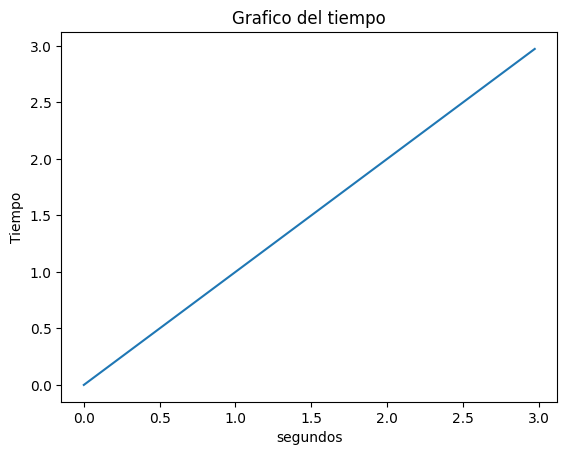

In [63]:
x = df['tiempo'].tolist()
y=df['tiempo'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
ax.set_title('Grafico del tiempo')
ax.set_ylabel('Tiempo')
ax.set_xlabel('segundos')
plt.show()

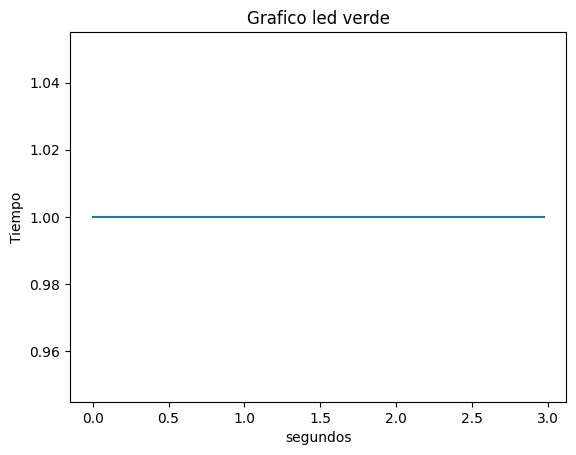

In [64]:
x = df['tiempo'].tolist()
y=df['led_verde'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
ax.set_title('Grafico led verde')
ax.set_ylabel('Tiempo')
ax.set_xlabel('segundos')
plt.show()

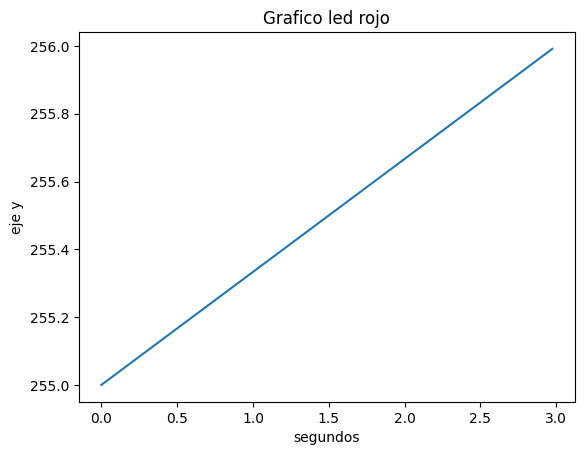

In [65]:
x = df['tiempo'].tolist()
y=df['led_rojo'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
ax.set_title('Grafico led rojo')
ax.set_ylabel('tiempo')
ax.set_xlabel('segundos')
plt.show()

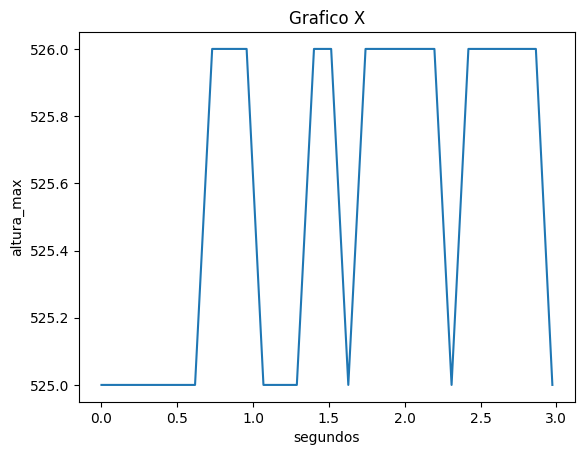

In [77]:
x = df['tiempo'].tolist()
y=df['val_x'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
ax.set_title('Grafico X')
ax.set_ylabel('altura_max')
ax.set_xlabel('segundos')
plt.show()

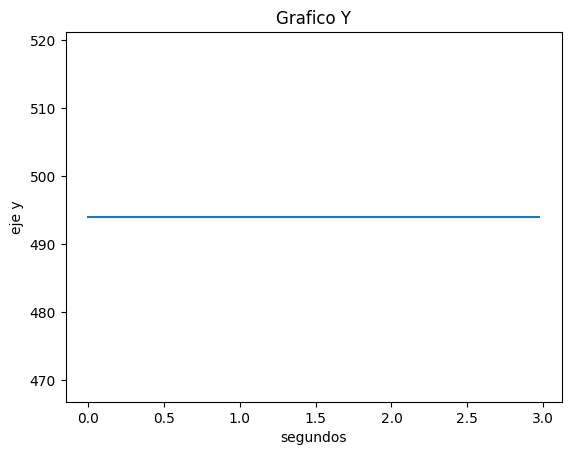

In [74]:
x = df['tiempo'].tolist()
y=df['val_y'].tolist()

ax = plt.figure().add_subplot()
ax.plot(x,y)
ax.set_title('Grafico Y')
ax.set_ylabel('eje y')
ax.set_xlabel('segundos')
plt.show()